In [3]:
from pathlib import Path

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from pptoolbox.preprocessing import SNV, MSC, SavitzkyGolay, Detrend
from pptoolbox.visualization import (plot_spectra, plot_loadings, plot_scree, fit_pca,
                                               generate_pc_df, plot_svp, initialize_theme,spectral_vector_properties)

# import data

In [4]:
datafolder_path = Path("../data/processed")
version = "v2"

X = pd.read_csv(datafolder_path / version / "full" / "input.csv", index_col=0)
y = pd.read_csv(datafolder_path / version / "full" / "label.csv", index_col=0)
y_meta = pd.read_csv(datafolder_path / version / "full" / "meta.csv", index_col=0)
print(f"Shapes of X, y, y_meta: {X.shape}, {y.shape}, {y_meta.shape}")

Shapes of X, y, y_meta: (342, 191), (342, 1), (342, 4)


In [5]:
SAMPLE_TYPE = "Ethanol"

# Check for Outliers

In [6]:
cmap=sns.color_palette()
PREPROCESSING = 'No Preprocessing'

output_dir = Path("../data/visualisation") / version / "outlier_check"
output_dir.mkdir(parents=True, exist_ok=True)

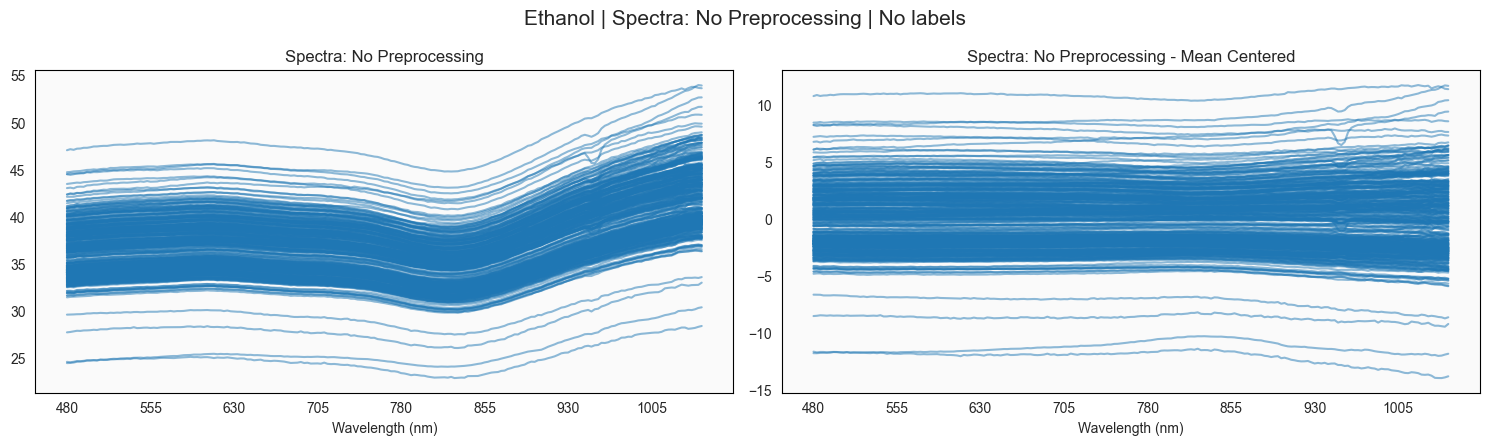

In [7]:
fig = plot_spectra(X, labels=None,
            spec_prep=PREPROCESSING,
            sample_type=SAMPLE_TYPE,
            cmap=cmap)

plt.savefig(output_dir / f"spectra_{PREPROCESSING}_original.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

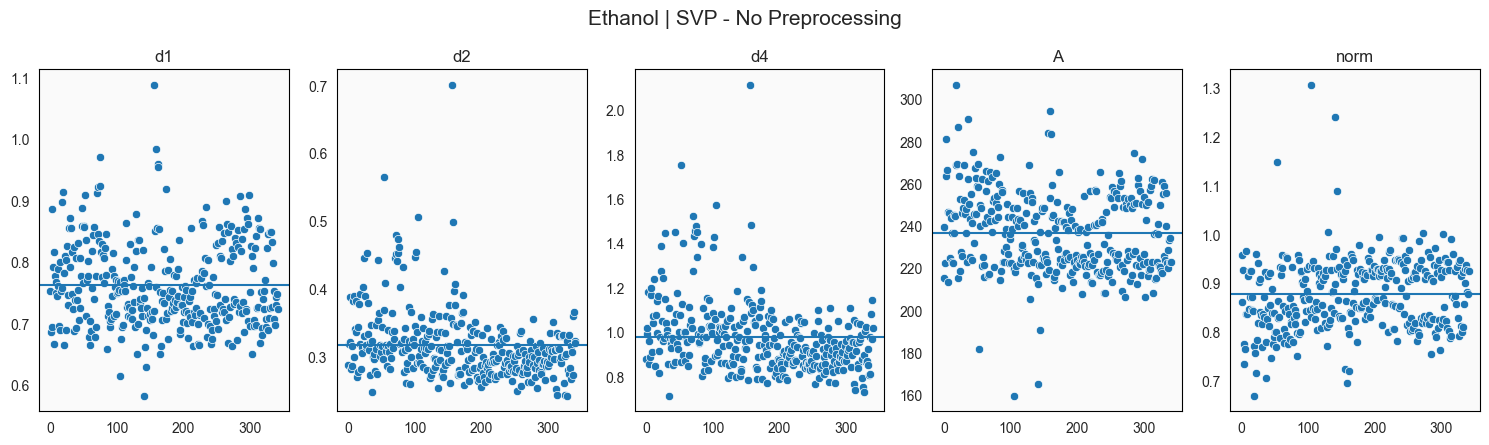

In [8]:
fig = plot_svp(X, title=f'{SAMPLE_TYPE} | SVP - No Preprocessing')

plt.savefig(output_dir / f"svp_{PREPROCESSING}_original.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

## identify outlier samples

In [9]:
# #metrics cutoff
# metrics = {
#     0 : 'd1',
#     1 : 'd2',
#     2 : 'd4',
#     3 : 'A',
#     4 : 'norm'
# }

# cutoffs = {
#     'choice': 0,
#     'maxval': 10,
#     'minval': 3,
#     'outliers': []
# }

In [10]:
# low_diff = X.max(axis=1) - X.min(axis=1) < 12.5
# high_diff = X.max(axis=1) - X.min(axis=1) > 20

In [11]:
# X_cleaned = X[~low_diff]
# print(f"Shape of X after removing anomalous samples: {X_cleaned.shape}")
# fig, ax = plot_spectra(X_cleaned, labels=None,
#             spec_prep=PREPROCESSING,
#             sample_type=f"{SAMPLE_TYPE} - Cleaned",
#             cmap=cmap)

# # set same y_lims for comparison
# ax[0].set_ylim(0, 110)

# plt.show()
# plt.close()

# fig.savefig(output_dir / f"spectra_{PREPROCESSING}_cleaned.png", dpi=300, bbox_inches='tight')

# X_inspect = X[(~high_diff & ~low_diff)]
# fig, ax = plot_spectra(X_inspect, labels=None,
#             spec_prep=PREPROCESSING,
#             sample_type=f"{SAMPLE_TYPE} - To inspect",
#             cmap=cmap)

# # set same y_lims for comparison
# ax[0].set_ylim(0, 110)

# plt.show()
# plt.close()

# X_removed = X[low_diff]
# print(f"Shape of removed X: {X_removed.shape}")
# fig, ax = plot_spectra(X_removed, labels=None,
#             spec_prep=PREPROCESSING,
#             sample_type=f"{SAMPLE_TYPE} - Removed",
#             cmap=cmap)

# # set same y_lims for comparison
# ax[0].set_ylim(0, 110)

# plt.show()
# plt.close()

# fig.savefig(output_dir / f"spectra_{PREPROCESSING}_removed.png", dpi=300, bbox_inches='tight')

In [12]:
# fig = plot_svp(X_cleaned, title=f'{SAMPLE_TYPE} | SVP - No Preprocessing')

# # svp_arr = spectral_vector_properties(X, True)

# # norm_data = svp_arr[metrics[cutoffs['choice']]]

# # anomalous_mask = (svp_arr[metrics[cutoffs['choice']]] < cutoffs['minval']) | (svp_arr[metrics[cutoffs['choice']]] > cutoffs['maxval'])
# # print(anomalous_mask.value_counts())

# # norm_ax = plt.gcf().axes[cutoffs['choice']]

# # count = 0

# # for idx in range(len(norm_data)):
# #     if norm_data.iloc[idx] < cutoffs['minval'] or norm_data.iloc[idx] > cutoffs['maxval']:  
# #         norm_ax.text(idx, norm_data.iloc[idx], norm_data.index[idx], 
# #                     fontsize=10, color='red')
# #         count += 1
# #     elif norm_data.index[idx] in cutoffs['outliers']:
# #         norm_ax.text(idx, norm_data.iloc[idx], norm_data.index[idx], 
# #                     fontsize=10, color='red')
# #         count += 1


# print(f"Number of removed samples: {low_diff.sum()}")
# print(f"Shape of X after removing anomalous samples: {X_cleaned.shape}")

# plt.savefig(output_dir / f"svp_{PREPROCESSING}_cleaned.png", dpi=300, bbox_inches='tight')
# plt.show()
# plt.close()

## prepare for export

In [14]:
# export_folder = Path("../data/processed") / version / "cleaned"
# export_folder.mkdir(parents=True, exist_ok=True)

In [15]:
# assert X.index.equals(y.index) and X.index.equals(y_meta.index)

# X_cleaned = X[~low_diff]
# y_cleaned = y[~low_diff]
# y_meta_cleaned = y_meta[~low_diff]

# assert X_cleaned.index.equals(y_cleaned.index) and X_cleaned.index.equals(y_meta_cleaned.index)

In [16]:
# X_cleaned.to_csv(export_folder / "input.csv")
# y_cleaned.to_csv(export_folder / "label.csv")
# y_meta_cleaned.to_csv(export_folder / "meta.csv")